In [27]:
# import necessary libraries
# import my libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (accuracy_score, confusion_matrix, ConfusionMatrixDisplay,
                            classification_report, precision_score, recall_score, f1_score)
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    mean_absolute_percentage_error,
    median_absolute_error,
    r2_score,
    explained_variance_score,
    max_error,
    mean_pinball_loss
)
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [2]:
# get the data
df = pd.read_csv('Exercise.csv')
df.head(5)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190,94,29,105,40.8,231
1,14861698,female,20,166,60,14,94,40.3,66
2,11179863,male,69,179,79,5,88,38.7,26
3,16180408,female,34,179,71,13,100,40.5,71
4,17771927,female,27,154,58,10,81,39.8,35


In [3]:
# Data understanding
df.shape

(15000, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  int64  
 4   Weight      15000 non-null  int64  
 5   Duration    15000 non-null  int64  
 6   Heart_Rate  15000 non-null  int64  
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 1.0+ MB


In [5]:
df.isna().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
# Descriptive statistics
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
User_ID,15000.0,14977358.54,2872851.45,10001159.0,12474190.75,14997285.0,17449278.75,19999647.0
Age,15000.0,42.79,16.98,20.0,28.00,39.0,56.00,79.0
Height,15000.0,174.47,14.26,123.0,164.00,175.0,185.00,222.0
Weight,15000.0,74.97,15.04,36.0,63.00,74.0,87.00,132.0
Duration,15000.0,15.53,8.32,1.0,8.00,16.0,23.00,30.0
Heart_Rate,15000.0,95.52,9.58,67.0,88.00,96.0,103.00,128.0
Body_Temp,15000.0,40.03,0.78,37.1,39.60,40.2,40.60,41.5
Calories,15000.0,89.54,62.46,1.0,35.00,79.0,138.00,314.0


In [8]:
df[df['Calories']==1.0]

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
645,18594088,male,20,184,84,1,76,37.8,1
1788,15883945,male,24,173,70,1,79,37.7,1
2056,16118167,male,21,180,76,1,74,37.6,1
2058,10235459,male,22,183,84,1,76,37.8,1
2135,11155609,male,25,194,93,2,69,37.9,1
2705,16176008,male,24,160,61,1,77,37.7,1
2732,14946022,male,28,166,66,2,72,38.0,1
3873,17012358,male,30,192,92,1,72,37.7,1
4923,13263146,male,24,178,77,1,76,38.0,1
8671,18281150,male,20,182,81,1,75,37.5,1


In [9]:
df.columns

Index(['User_ID', 'Gender', 'Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp', 'Calories'],
      dtype='object')

In [10]:
num_cols= ['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp', 'Calories']

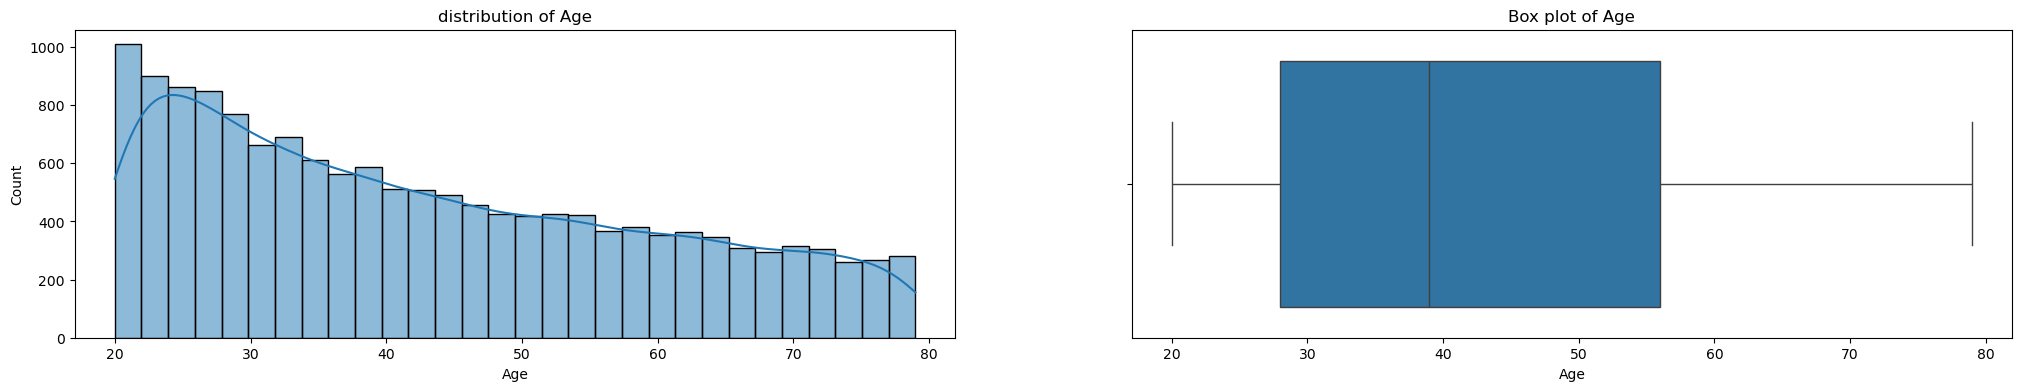

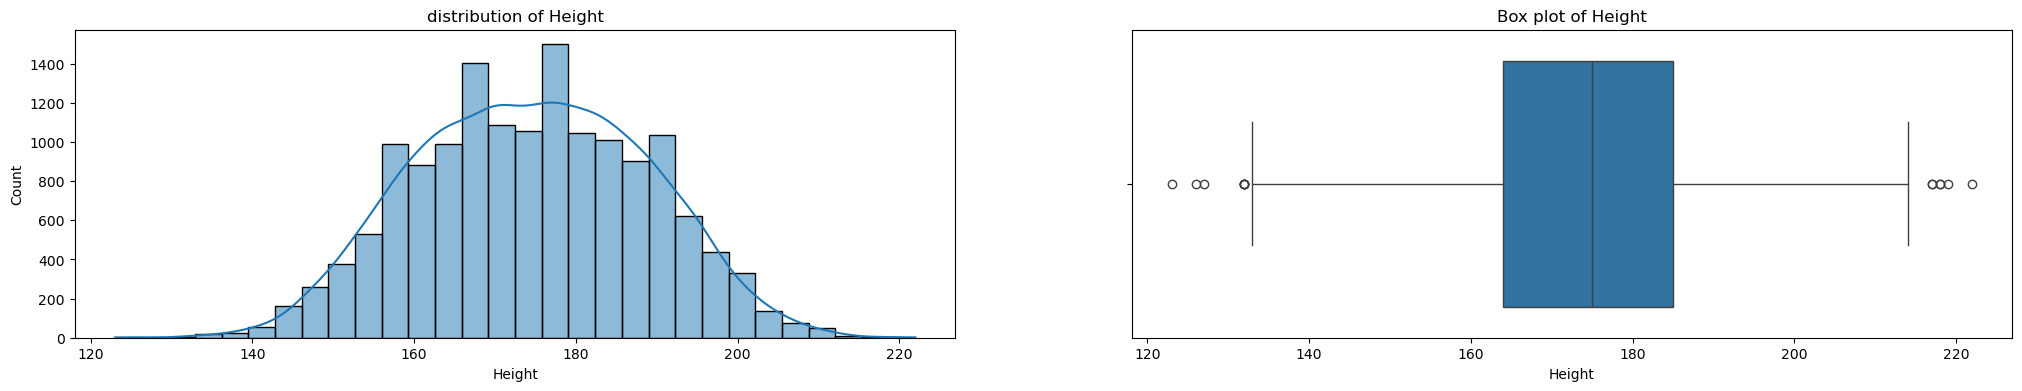

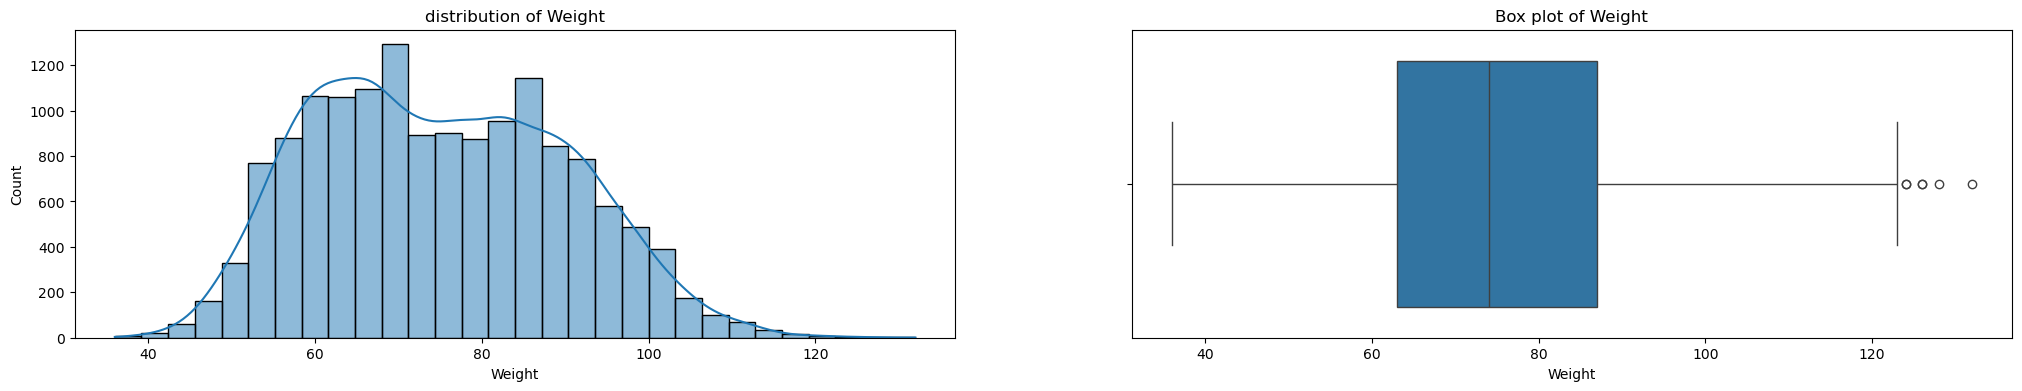

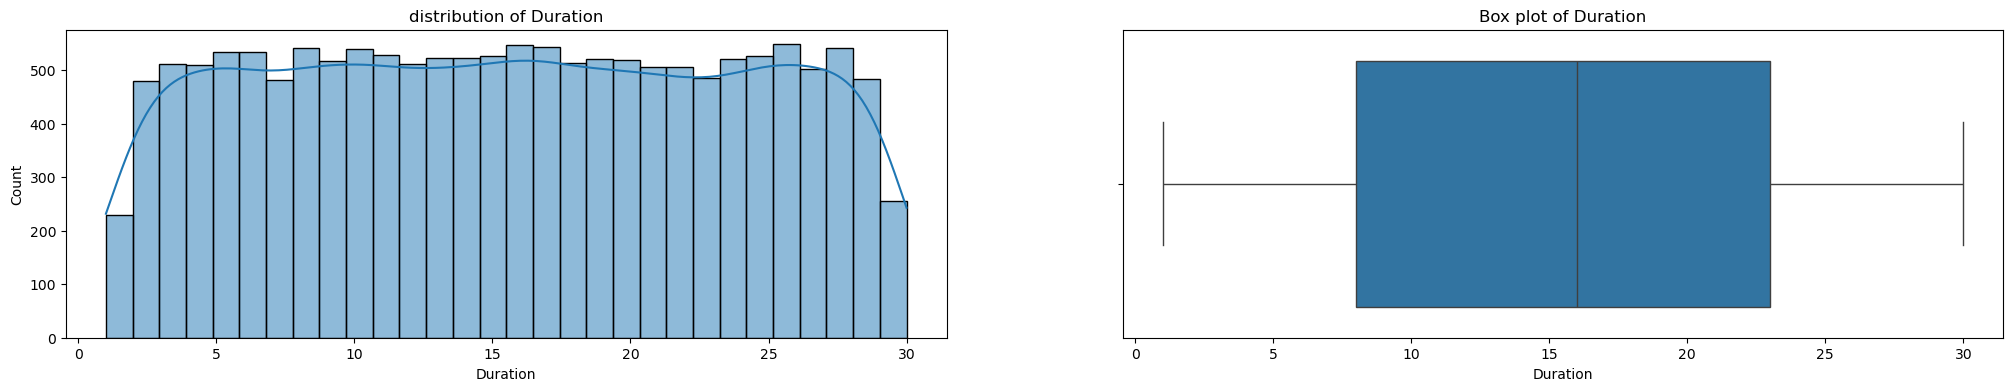

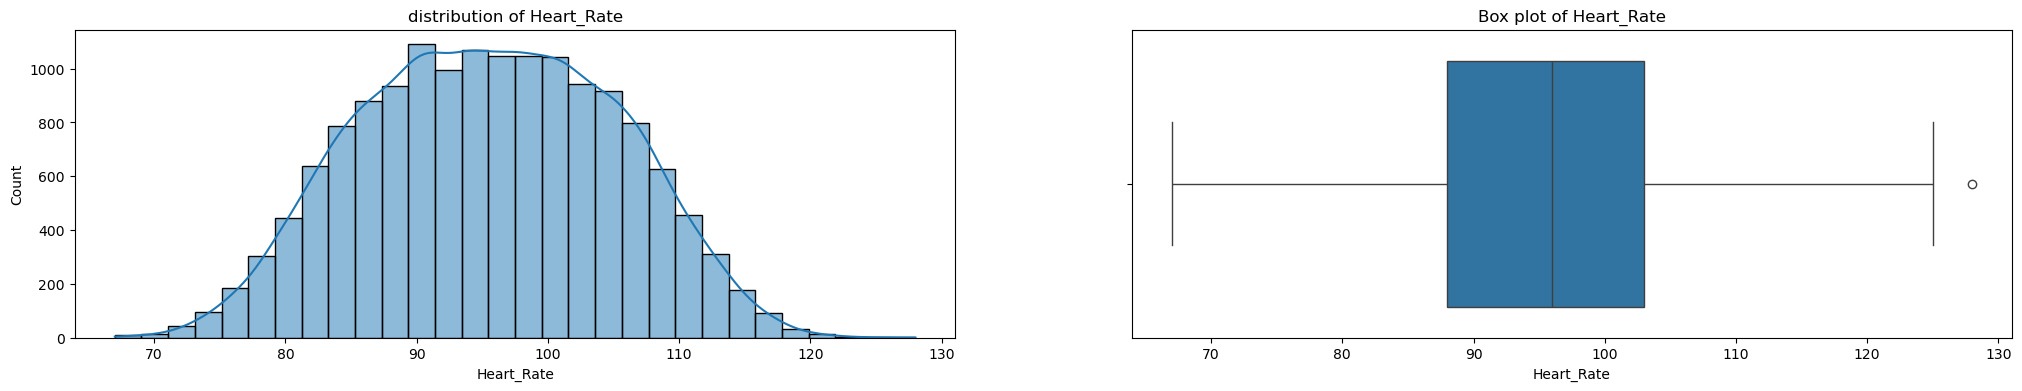

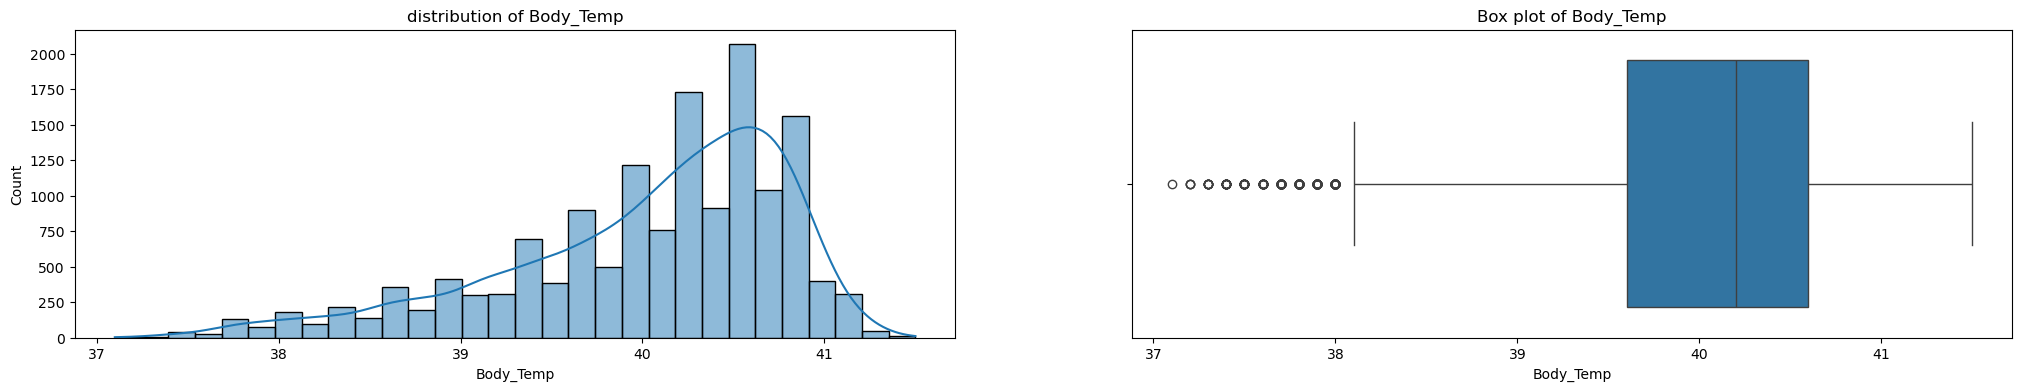

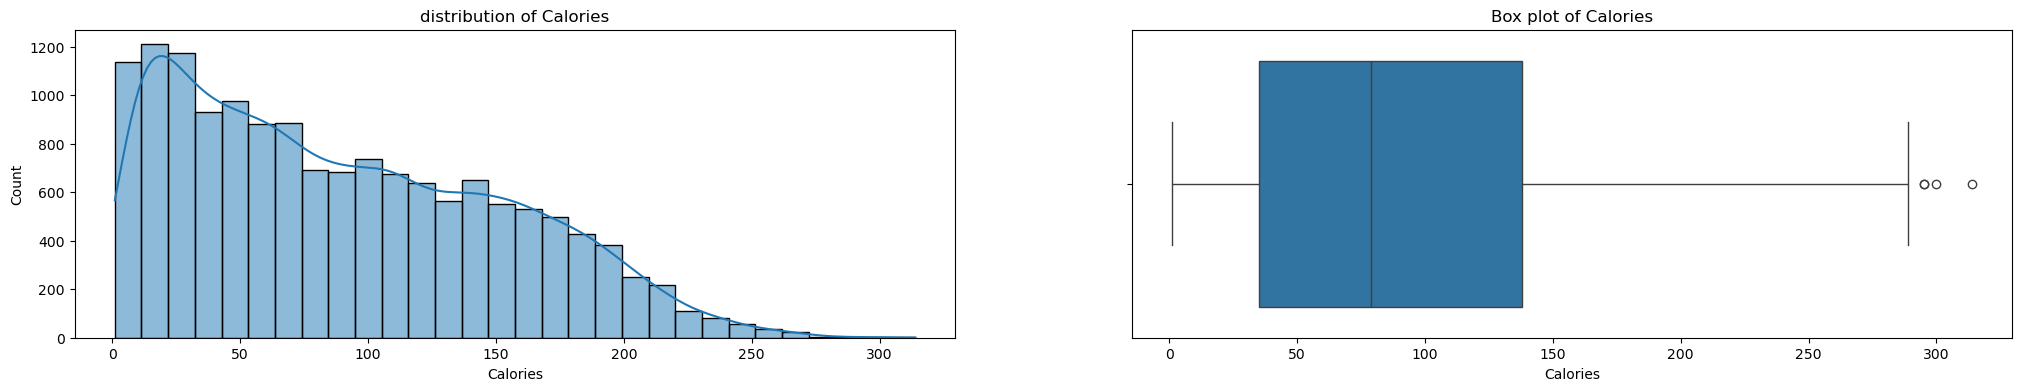

In [11]:
# distribution of  the numeric columns
for col in num_cols:
    plt.figure(figsize=(25, 4))
    # for histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data=df[col], kde=True, bins=30)
    plt.title(f'distribution of {col}')

    # box plot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.title(f'Box plot of {col}')
    plt.show()

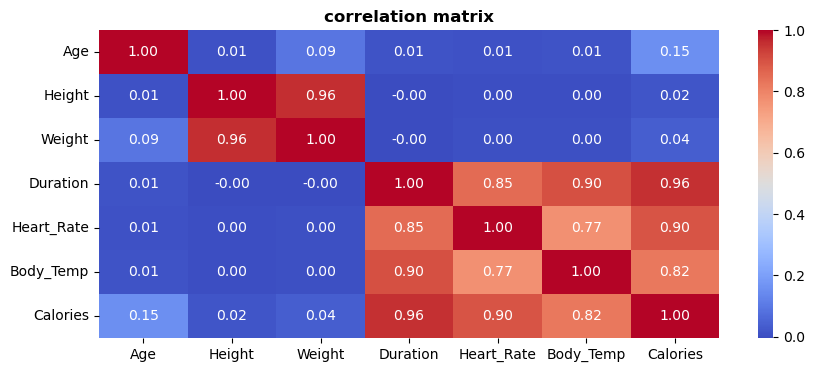

In [12]:
#checking for the correlation matrix
plt.figure(figsize=(10, 4))
heatmap = df[num_cols].corr()
sns.heatmap(data=heatmap, fmt='.2f', annot=True, cmap='coolwarm')
plt.title('correlation matrix',fontweight='bold')
plt.show()

#### feature construction
$$BMI = \frac{weight}{(height)^2} $$

In [13]:
# convert from cm to m 
df['Bmi']= df['Weight'] / (df['Height'] / 100)**2

In [14]:
df.columns

Index(['User_ID', 'Gender', 'Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp', 'Calories', 'Bmi'],
      dtype='object')

In [15]:
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
User_ID,15000.0,14977358.54,2872851.45,10001159.00,12474190.75,14997285.00,17449278.75,19999647.00
Age,15000.0,42.79,16.98,20.00,28.00,39.00,56.00,79.00
Height,15000.0,174.47,14.26,123.00,164.00,175.00,185.00,222.00
Weight,15000.0,74.97,15.04,36.00,63.00,74.00,87.00,132.00
Duration,15000.0,15.53,8.32,1.00,8.00,16.00,23.00,30.00
Heart_Rate,15000.0,95.52,9.58,67.00,88.00,96.00,103.00,128.00
Body_Temp,15000.0,40.03,0.78,37.10,39.60,40.20,40.60,41.50
Calories,15000.0,89.54,62.46,1.00,35.00,79.00,138.00,314.00
Bmi,15000.0,24.34,1.56,19.23,23.24,24.38,25.49,29.07


In [16]:
# Data preparation
df.columns

Index(['User_ID', 'Gender', 'Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp', 'Calories', 'Bmi'],
      dtype='object')

In [17]:
x= df.drop(columns=['User_ID', 'Calories'])
y= df['Calories']

In [18]:
# split into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#separate into num_col and cat_col
num_cols = ['Age', 'Height','Weight','Duration','Heart_Rate','Body_Temp','Bmi']
cat_cols = ['Gender']

# create a pipline for preprocessing
num_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline(steps=[
    ('encoder', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
])

# Apply the preprocessing
preprocessor = ColumnTransformer(transformers=[
    ('num', num_pipeline, num_cols),
    ('cat', cat_pipeline, cat_cols)
])
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['Age', 'Height', 'Weight', 'Duration',
                                  'Heart_Rate', 'Body_Temp', 'Bmi']),
                                ('cat',
                                 Pipeline(steps=[('encoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Gender'])])

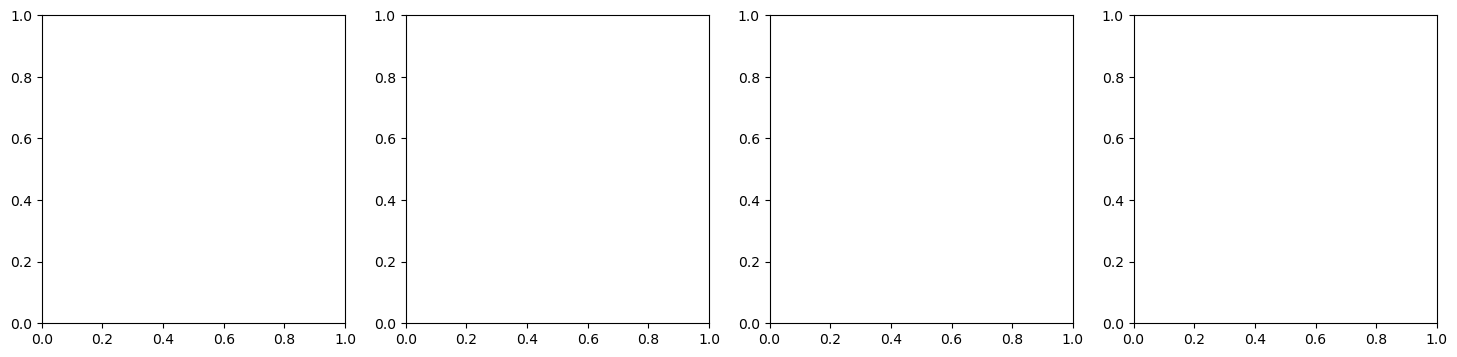

In [28]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boost': GradientBoostingRegressor(random_state=42)
}

# using for loop to evaluate our model
fig, axes = plt.subplots(1, 4, figsize=(18, 4))
results = {}
for (name, model), ax in zip(models.items(), axes.flatten()):
    pipeline = Pipeline(steps=[
        ('Preprocessor', preprocessor),
        ('Model', model)
    ])
    
    # Train the model
    pipeline.fit(x_train, y_train)
    train_pred = pipeline.predict(x_train)
    test_pred = pipeline.predict(x_test)

    # Calculate metrics
    Train_mean_absolute_error = mean_absolute_error(y_train, train_pred)
    Test_mean_absolute_error = mean_absolute_error(y_test, test_pred)
    Train_mean_squared_error = mean_squared_error(y_train, train_pred)
    Test_mean_squared_error = mean_squared_error(y_test, test_pred)
    Train_mean_absolute_percentage_error = mean_absolute_percentage_error(y_train, train_pred)
    Test_mean_absolute_percentage_error = mean_absolute_percentage_error(y_test, test_pred)
    Train_median_absolute_error = median_absolute_error(y_train, train_pred)
    Test_median_absolute_error = median_absolute_error(y_test, test_pred)
    Train_r2 = r2_score(y_train, train_pred)
    Test_r2 = r2_score(y_test, test_pred)
    Train_explained_var = explained_variance_score(y_train, train_pred)
    Test_explained_var = explained_variance_score(y_test, test_pred)
    Train_max_err = max_error(y_train, train_pred)
    Test_max_err = max_error(y_test, test_pred)
    Train_pinball_loss = mean_pinball_loss(y_train, train_pred)
    Test_pinball_loss = mean_pinball_loss(y_test, test_pred)

    # Store the results
    results[name] = {
        'train_mean_absolute_error': Train_mean_absolute_error,
        'test_mean_absolute_error': Test_mean_absolute_error,
        'train_mean_squared_error': Train_mean_squared_error,
        'test_mean_squared_error': Test_mean_squared_error,
        'train_mean_absolute_percentage_error': Train_mean_absolute_percentage_error,
        'test_mean_absolute_percentage_error': Test_mean_absolute_percentage_error,
        'train_median_absolute_error': Train_median_absolute_error,
        'test_median_absolute_error': Test_median_absolute_error,
        'train_r2_score': Train_r2,
        'test_r2_score': Test_r2,
        'train_explained_variance_score': Train_explained_var,
        'test_explained_variance_score': Test_explained_var,
        'train_max_error': Train_max_err,
        'test_max_error': Test_max_err,
        'train_mean_pinball_loss': Train_pinball_loss,
        'test_mean_pinball_loss': Test_pinball_loss
    }

In [24]:
metrics_df = pd.DataFrame(results)
metrics_df

,Linear Regression,Decision Tree,Random Forest
train_mean_absolute_error,8.044797,0.000000,0.000000
test_mean_absolute_error,8.194870,4.875333,4.057333
train_mean_squared_error,120.485695,0.000000,0.000000
test_mean_squared_error,125.883625,61.113333,38.406667
train_mean_absolute_percentage_error,0.296085,0.000000,0.000000
test_mean_absolute_percentage_error,0.293694,0.062255,0.054294
train_median_absolute_error,6.172342,0.000000,0.000000
test_median_absolute_error,6.231351,3.000000,2.000000
train_r2_score,0.968833,1.000000,1.000000
test_r2_score,0.968808,0.984857,0.990483
